In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

In [9]:
from gpts import GPT, GPTPico1
from addition_dataset import *

In [4]:
mypicogpt = GPTPico1(vocab_sz=9, seq_len=15, padding_char_enc=5)
mypicogpt.compile(loss='temporal_cross_entropy')

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 15, 9]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 15, 24]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 15, 24]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 15, 96]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 15, 24]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 15, 24]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 4, 15, 15]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 15, 24]
	Dense layer output(QKVBlock_Key) shape: [1, 15, 24]
	Dense layer output(QKVBlock_Query) shape: [1, 15, 24]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 15, 24]
	Positional encoding layer output(Positio

In [7]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_multiplication_dataset(N=5000, val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]

In [8]:
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
picogpt_small = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_small.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_small.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=128,
    max_epochs=100,
    patience=15,
    lr_patience=5,
    lr_decay_factor=0.5,
    lr_max_decays=4,
    val_every=1,
    verbose=True
)

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 10, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 10, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 10, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 10, 10]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 10, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 10, 64]
	Positional encoding layer output(Posi

In [9]:
N_show = 3
x_splits = [x_train, x_val]
split_labels = ['train', 'val']

for i in range(2):
    x = x_splits[i]
    split = split_labels[i]

    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)

    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {x_str}')


    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_small.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')

train
x_str: [['4', '7', '*', '5', '1', '=', '2', '3', '9', '7'], ['7', '5', '*', '9', '5', '=', '7', '1', '2', '5'], ['3', '*', '1', '4', '=', '4', '2', '.', '#', '#'], ['8', '2', '*', '9', '4', '=', '7', '7', '0', '8'], ['2', '4', '*', '3', '1', '=', '7', '4', '4', '.'], ['8', '6', '*', '4', '2', '=', '3', '6', '1', '2'], ['2', '7', '*', '8', '2', '=', '2', '2', '1', '4'], ['2', '5', '*', '4', '0', '=', '1', '0', '0', '0'], ['6', '4', '*', '5', '4', '=', '3', '4', '5', '6'], ['8', '*', '2', '=', '1', '6', '.', '#', '#', '#'], ['8', '6', '*', '7', '5', '=', '6', '4', '5', '0'], ['8', '3', '*', '5', '3', '=', '4', '3', '9', '9'], ['8', '1', '*', '3', '2', '=', '2', '5', '9', '2'], ['4', '5', '*', '7', '8', '=', '3', '5', '1', '0'], ['1', '2', '*', '3', '0', '=', '3', '6', '0', '.'], ['1', '2', '*', '4', '5', '=', '5', '4', '0', '.'], ['9', '7', '*', '1', '3', '=', '1', '2', '6', '1'], ['3', '8', '*', '4', '0', '=', '1', '5', '2', '0'], ['9', '0', '*', '2', '0', '=', '1', '8', '0', '0']

## subtraction, multiplication, floor division, oh my

In [ ]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_blank_dataset(N=5000, operation='%', val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]

tf.keras.backend.clear_session()
tf.random.set_seed(0)

picogpt_small = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_small.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_small.fit(x=x_train,y=y_train,x_val=x_val,y_val=y_val,batch_size=128,max_epochs=100,patience=15,lr_patience=5,lr_decay_factor=0.5,lr_max_decays=4,val_every=1,verbose=True)

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 8, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 8, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 8, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 8, 8]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 8, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 8, 64]
	Positional encoding layer output(Positional_Encod

In [13]:
N_show = 30
x_splits = [x_train, x_val]
split_labels = ['train', 'val']
for i in range(2):
    x = x_splits[i]
    split = split_labels[i]
    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {x_str}')
    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_small.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')

train
x_str: [['4', '7', '%', '5', '1', '=', '4', '7'], ['7', '5', '%', '9', '5', '=', '7', '5'], ['3', '%', '1', '4', '=', '3', '.', '#'], ['8', '2', '%', '9', '4', '=', '8', '2'], ['2', '4', '%', '3', '1', '=', '2', '4'], ['8', '6', '%', '4', '2', '=', '2', '.'], ['2', '7', '%', '8', '2', '=', '2', '7'], ['2', '5', '%', '4', '0', '=', '2', '5'], ['6', '4', '%', '5', '4', '=', '1', '0'], ['8', '%', '2', '=', '0', '.', '#', '#'], ['8', '6', '%', '7', '5', '=', '1', '1'], ['8', '3', '%', '5', '3', '=', '3', '0'], ['8', '1', '%', '3', '2', '=', '1', '7'], ['4', '5', '%', '7', '8', '=', '4', '5'], ['1', '2', '%', '3', '0', '=', '1', '2'], ['1', '2', '%', '4', '5', '=', '1', '2'], ['9', '7', '%', '1', '3', '=', '6', '.'], ['3', '8', '%', '4', '0', '=', '3', '8'], ['9', '0', '%', '2', '0', '=', '1', '0'], ['5', '0', '%', '2', '6', '=', '2', '4'], ['1', '%', '7', '5', '=', '1', '.', '#'], ['6', '%', '2', '8', '=', '6', '.', '#'], ['4', '9', '%', '4', '8', '=', '1', '.'], ['1', '1', '%', '9',

In [ ]:
def train_and_evaluate_diff(N_eval, N_show, operation='+'):
    x_train, y_train, x_val, y_val, char2ind_map = get_blank_dataset(N=5000, operation=operation, val_prop=0.1)
    vocab_sz = len(char2ind_map)
    seq_len = x_train.shape[1]
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    picogpt_small = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
    picogpt_small.compile(loss='temporal_cross_entropy')
    train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_small.fit(x=x_train,y=y_train,x_val=x_val,y_val=y_val,batch_size=128,max_epochs=100,patience=15,lr_patience=5,lr_decay_factor=0.5,lr_max_decays=4,val_every=1,verbose=False)

    #eval
    answer_hist = []
    true_answer_hist = []
    N = len(x_val)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x_val.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {x_str}')
    for i in range(N_eval):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        if i < N_show:
            answer = picogpt_small.generate_sequence(prompt=curr_prompt,length=seq_len,char2ind_map=char2ind_map,ind2char_map=ind2char_map,
                                                end_char='.')
            print(f'Answer: {answer}')
            print('Correct answer is:', curr_ans)
            print('---------------------')
        else:
            answer = picogpt_small.generate_sequence(prompt=curr_prompt,length=seq_len,char2ind_map=char2ind_map,ind2char_map=ind2char_map,
                                                end_char='.', live_print=False)

        gen_str = ''.join(answer).split('.')[0]   # e.g. ['3','4','.','#'] → "34"
        answer_as_int = int(gen_str)           # → 34

        answer_hist.append(answer_as_int)
        true_answer_hist.append(curr_ans)
        return np.array(answer_hist), np.array(true_answer_hist)

SyntaxError: invalid syntax (1075451074.py, line 30)

In [34]:
import numpy as np, tensorflow as tf
import re, numpy as np

def safe_parse_predicted(gen_tokens):
    """
    Join the generated tokens, strip at the '.', then return the first
    group of digits as an int.  If no digits found, return np.nan.
    """
    s = ''.join(gen_tokens).split('.')[0]
    m = re.match(r'(\d+)', s)
    return int(m.group(1)) if m else np.nan
    
def train_and_evaluate_diff(N_eval, N_show, operation='+'):
    x_tr,y_tr,x_val,y_val,char2ind_map = get_blank_dataset(5000, operation, max_operand_digits=2, seed=1, val_prop=0.1)
    vocab_sz, seq_len = len(char2ind_map), x_tr.shape[1]
    tf.keras.backend.clear_session(); tf.random.set_seed(0)
    model = GPTPico1(vocab_sz=vocab_sz, seq_len=seq_len, padding_char_enc=char2ind_map['#'], num_heads=8, embed_dim=64)
    model.compile(loss='temporal_cross_entropy')
    model.fit(x=x_tr,y=y_tr,x_val=x_val,y_val=y_val,batch_size=128,max_epochs=100,patience=15,lr_patience=5,lr_decay_factor=0.5,lr_max_decays=4,val_every=1,verbose=False)

    ind2c = make_ind2char_mapping(char2ind_map)
    prompts, trues = split_sum_and_answer(convert_int2str(x_val.numpy(), ind2c))
    answer_hist, true_hist = [], []

    for i in range(N_eval):
        gen = model.generate_sequence(prompt=prompts[i], length=seq_len, char2ind_map=char2ind_map, ind2char_map=ind2c, end_char='.', live_print=(i< N_show))
        if i < N_show:
            print(f'Prompt: {prompts[i]}\nGen: {gen}\nTrue: {trues[i]}\n{"—"*20}')
        pred = safe_parse_predicted(gen)
        true = int(trues[i].split('.')[0])
        answer_hist.append(pred)
        true_hist.append(true)

    return np.array(answer_hist), np.array(true_hist)



---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer output(Positional_Encod

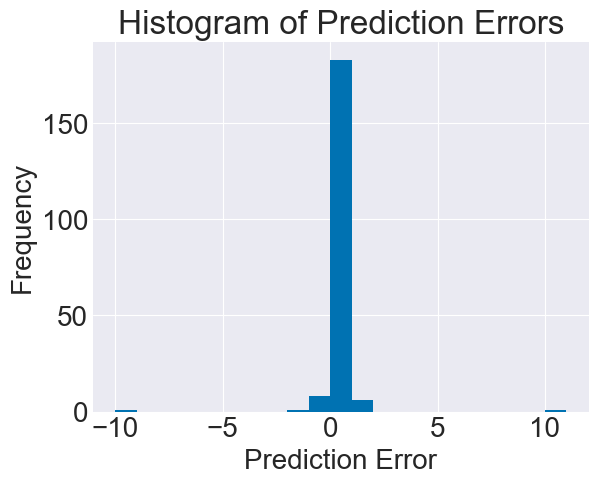

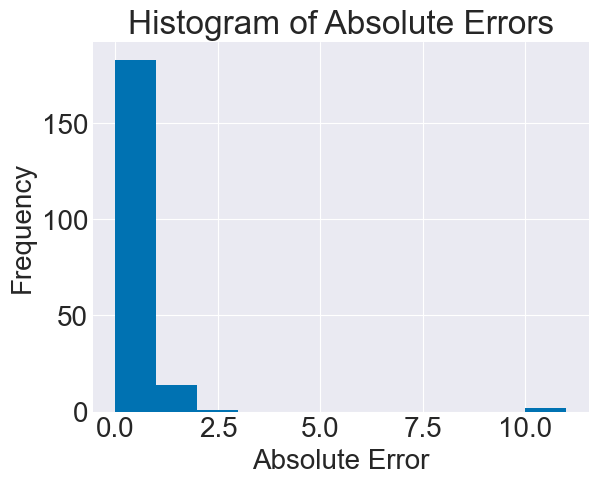

In [ ]:
preds, trues = train_and_evaluate_diff(N_eval=2000, N_show=5, operation='+')
errors = preds - trues
abs_errors = np.abs(errors)

plt.figure()
plt.hist(errors, bins=range(int(errors.min()), int(errors.max()) + 2))
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

plt.figure()
plt.hist(abs_errors, bins=range(int(abs_errors.min()), int(abs_errors.max()) + 2))
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors')
plt.show()

In [35]:
def plot_pred_vs_true(true_hist, pred_hist, operator):
    plt.figure(figsize=(6,6))
    plt.scatter(true_hist, pred_hist, alpha=0.5)
    # identity line
    mn = min(true_hist.min(), pred_hist.min())
    mx = max(true_hist.max(), pred_hist.max())
    plt.plot([mn, mx], [mn, mx], 'k--', linewidth=1)
    plt.xlabel("True Value")
    plt.ylabel("Predicted Value")
    plt.title(f"Pred vs True — Operator {operator}")
    plt.tight_layout()
    plt.show()

DOING OPERATOR +
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer output(

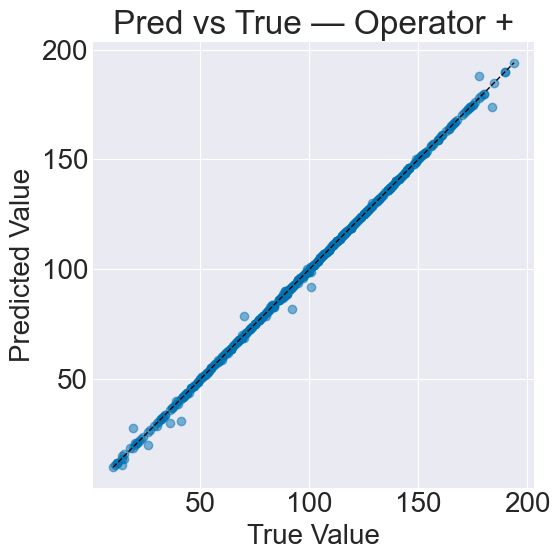

Operator +: 90.80% exact match
DOING OPERATOR *
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 10, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 10, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 10, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 10, 10]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 10, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1,

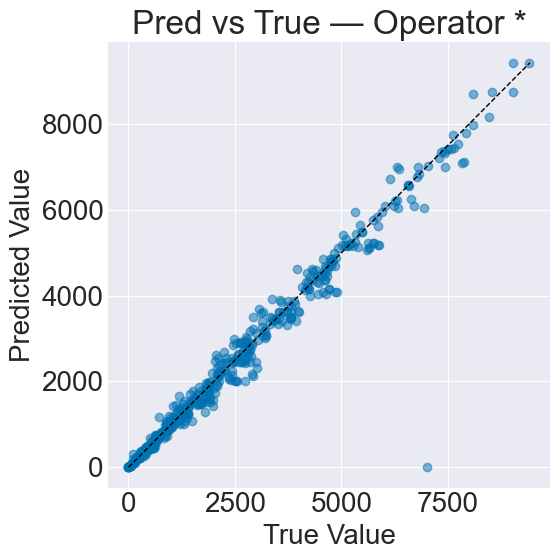

Operator *: 21.00% exact match
DOING OPERATOR /
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 8, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 8, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 8, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 8, 8]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 8, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 8, 64]
	Po

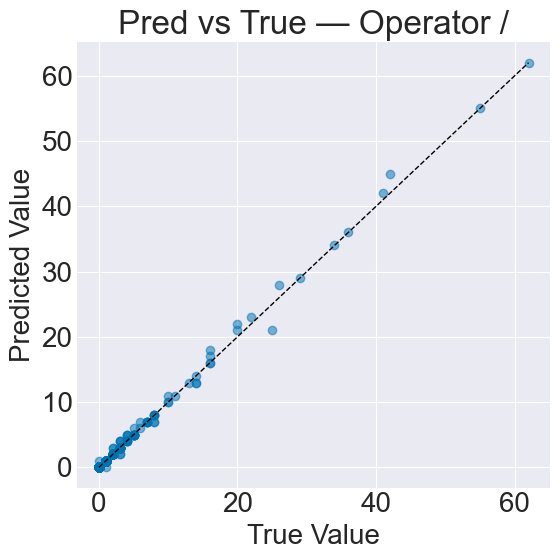

Operator /: 94.40% exact match
DOING OPERATOR %


c:\Users\alexl\Documents\GitHub\Jan2025OWLyon\CS444-project4\addition_dataset.py:382: RuntimeWarning: divide by zero encountered in remainder
  results  = operands[:, 0] % operands[:, 1]


---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 8, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 8, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 8, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 8, 8]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 8, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 8, 64]
	Positional encoding layer output(Positional_Encodi

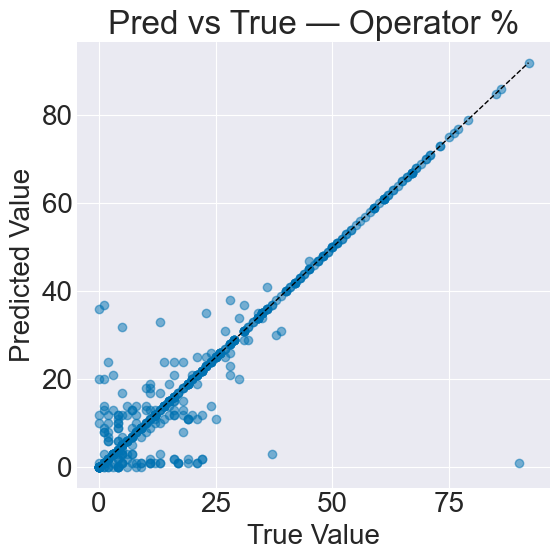

Operator %: 67.80% exact match


In [36]:
operators = ['+', '*', '/', '%']
for op in operators:
    print(f"DOING OPERATOR {op}")
    pred_hist, true_hist = train_and_evaluate_diff(N_eval=500, N_show=0, operation=op)
    answer_hist = np.array(pred_hist)
    true_hist   = np.array(true_hist)
        #    to treat un-parsed as wrong:
    accuracy = np.mean(answer_hist == true_hist)

    # to ignore them in plots:
    mask = ~np.isnan(answer_hist)
    plot_pred_vs_true(true_hist[mask], answer_hist[mask], op)
    print(f"Operator {op}: {accuracy*100:.2f}% exact match")


In [ ]:
preds, trues = train_and_evaluate_diff(N_eval=2000, N_show=5, operation='+')
errors = preds - trues
abs_errors = np.abs(errors)

plt.figure()
plt.hist(errors, bins=range(int(errors.min()), int(errors.max()) + 2))
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

plt.figure()
plt.hist(abs_errors, bins=range(int(abs_errors.min()), int(abs_errors.max()) + 2))
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors')
plt.show()

In [8]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_reduction_dataset(N=5000, max_operand_digits=5, digit=0, val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
picogpt_small = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_small.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_small.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=128,
    max_epochs=100,
    patience=15,
    lr_patience=5,
    lr_decay_factor=0.5,
    lr_max_decays=4,
    val_every=1,
    verbose=True
)

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer output(Positional_Encod

In [9]:
N_show = 30
x_splits = [x_train, x_val]
split_labels = ['train', 'val']
for i in range(2):
    x = x_splits[i]
    split = split_labels[i]
    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {x_str}')
    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_small.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')

train
x_str: [['4', '7', '3', '1', '8', 'd', '0', '=', '8'], ['5', '1', '1', '8', '2', 'd', '0', '=', '2'], ['7', '5', '5', '1', '6', 'd', '0', '=', '6'], ['9', '5', '0', '4', '6', 'd', '0', '=', '6'], ['0', '3', '4', '8', '5', 'd', '0', '=', '5'], ['1', '4', '4', '1', '5', 'd', '0', '=', '5'], ['8', '2', '2', '9', '4', 'd', '0', '=', '4'], ['9', '4', '8', '6', '4', 'd', '0', '=', '4'], ['2', '4', '9', '2', '2', 'd', '0', '=', '2'], ['3', '1', '1', '8', '3', 'd', '0', '=', '3'], ['8', '6', '9', '0', '2', 'd', '0', '=', '2'], ['4', '2', '3', '3', '2', 'd', '0', '=', '2'], ['2', '7', '3', '1', '6', 'd', '0', '=', '6'], ['8', '2', '7', '7', '0', 'd', '0', '=', '0'], ['2', '5', '6', '9', '9', 'd', '0', '=', '9'], ['4', '0', '9', '1', '9', 'd', '0', '=', '9'], ['6', '4', '3', '8', '2', 'd', '0', '=', '2'], ['5', '4', '9', '5', '9', 'd', '0', '=', '9'], ['0', '8', '5', '7', '3', 'd', '0', '=', '3'], ['0', '2', '7', '5', '5', 'd', '0', '=', '5'], ['8', '6', '5', '5', '8', 'd', '0', '=', '8'],

In [6]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_reduction_dataset(N=5000, max_operand_digits=5, digit=2, val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
picogpt_small = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_small.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_small.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=128,
    max_epochs=100,
    patience=15,
    lr_patience=5,
    lr_decay_factor=0.5,
    lr_max_decays=4,
    val_every=1,
    verbose=True
)
N_show = 30
x_splits = [x_train, x_val]
split_labels = ['train', 'val']
for i in range(2):
    x = x_splits[i]
    split = split_labels[i]
    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {x_str}')
    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_small.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')


---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer output(Positional_Enco

In [20]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_blank_dataset(N=1000, operation = '+', max_operand_digits=1,val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
picogpt_addition = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_addition.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_addition.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=128,
    max_epochs=100,
    patience=15,
    lr_patience=5,
    lr_decay_factor=0.5,
    lr_max_decays=4,
    val_every=1,
    verbose=True
)
N_show = 30
x_splits = [x_train, x_val]
split_labels = ['train', 'val']
for i in range(2):
    x = x_splits[i]
    split = split_labels[i]
    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    # print(f'x_str: {x_str}')
    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_addition.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 6, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 6, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 6, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 6, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 6, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 6, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 6, 6]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 6, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 6, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 6, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 6, 64]
	Positional encoding layer output(Positional_Encod

In [18]:
# doing 5k samps as said in email
x_train, y_train, x_val, y_val, char2ind_map = get_reduction_dataset_multi(N_per=2000, max_operand_digits=5,val_prop=0.1)
vocab_sz = len(char2ind_map)
seq_len = x_train.shape[1]
tf.keras.backend.clear_session()
tf.random.set_seed(0)

# Your code here
picogpt_digits = GPTPico1(vocab_sz=100, seq_len=seq_len, padding_char_enc=99, num_heads=8, embed_dim=64)
picogpt_digits.compile(loss='temporal_cross_entropy')

train_loss_hist, val_loss_hist, val_acc_hist, n_epochs= picogpt_digits.fit(
    x=x_train,
    y=y_train,
    x_val=x_val,
    y_val=y_val,
    batch_size=128,
    max_epochs=100,
    patience=15,
    lr_patience=5,
    lr_decay_factor=0.5,
    lr_max_decays=4,
    val_every=1,
    verbose=True
)
N_show = 30
x_splits = [x_train, x_val]
split_labels = ['train', 'val']
for i in range(2):
    x = x_splits[i]
    split = split_labels[i]
    print(50*'=')
    print(split)
    print(50*'=')
    N = len(x)
    ind2char_map = make_ind2char_mapping(char2ind_map)
    x_str = convert_int2str(x_int=x.numpy(), ind2char_map=ind2char_map)
    prompts, correct_answers = split_sum_and_answer(x_str)
    print(f'x_str: {prompts}')
    for i in range(N_show):
        curr_prompt = prompts[i]
        curr_ans = correct_answers[i]
        answer = picogpt_digits.generate_sequence(prompt=curr_prompt,
                                            length=seq_len,
                                            char2ind_map=char2ind_map,
                                            ind2char_map=ind2char_map,
                                            end_char='.')
        print(f'Answer: {answer}')
        print('Correct answer is:', curr_ans)
        print('---------------------')

---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 100]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer output(Positional_Encod

In [ ]:
# picogpt_addition
# picogpt_digits

prompts, correct_answers = split_sum_and_answer(x_str)
prompt = ['2+5=']
answer = picogpt_addition.generate_sequence(prompt=prompt,
                                    length=seq_len,
                                    char2ind_map=char2ind_map,
                                    ind2char_map=ind2char_map,
                                    end_char='.')

## Comepare operators


— DOING OPERATOR + —
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 9, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 9, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 9, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 9, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 9, 9]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 9, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 9, 64]
Positional_Encoding_Block_0:
	Dropout layer output(Positional_Encoding_Block_0_Dropout) shape: [1, 9, 64]
	Positional encoding layer ou

C:\Users\alexl\AppData\Local\Temp\ipykernel_29664\691114975.py:39: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\alexl\miniconda3\envs\tf_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


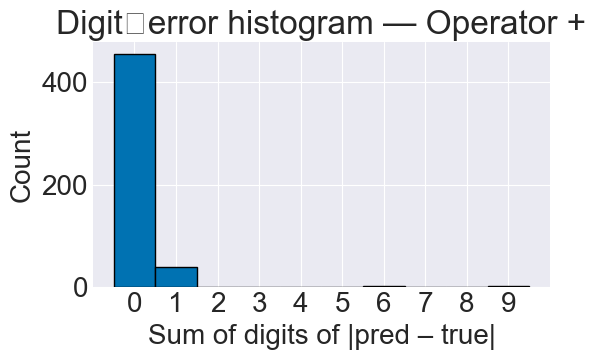

Non‐numeric (unparsed) answers: 0
Mean digit‐error (parsed only): 0.17
Median digit‐error: 0.00
Max digit‐error: 9

— DOING OPERATOR * —
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 10, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 10, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 10, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 10, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 10, 10]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 10, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 10, 64]
Positiona

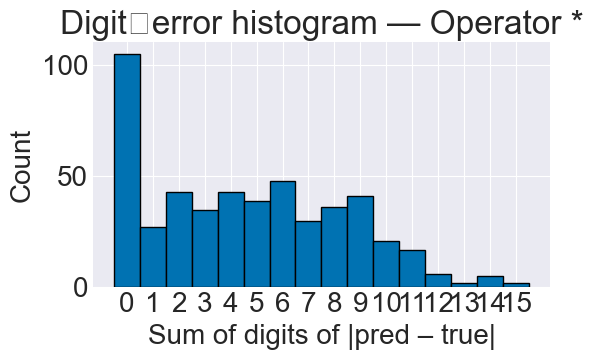

Non‐numeric (unparsed) answers: 0
Mean digit‐error (parsed only): 4.67
Median digit‐error: 4.00
Max digit‐error: 15

— DOING OPERATOR / —
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 8, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 8, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 8, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 8, 8]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 8, 64]
Positional_Encoding

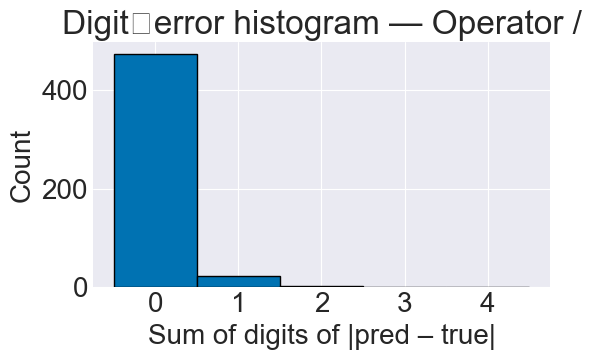

Non‐numeric (unparsed) answers: 0
Mean digit‐error (parsed only): 0.07
Median digit‐error: 0.00
Max digit‐error: 4

— DOING OPERATOR % —
---------------------------------------------------------------------------
Dense layer output(Output_Layer) shape: [1, 8, 14]
Transformer_Block_0:
	Transformer_Block_0_MLP:
	Dropout layer output(Transformer_Block_0_MLP_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense2) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MLP_Dense1) shape: [1, 8, 256]
	Transformer_Block_0_MHA:
	Dropout layer output(Transformer_Block_0_MHA_Dropout) shape: [1, 8, 64]
	Dense layer output(Transformer_Block_0_MHA_Dense) shape: [1, 8, 64]
	Transformer_Block_0_MHA_Attention:
	Dropout layer output(attention_dropout) shape: [1, 8, 8, 8]
	Transformer_Block_0_MHA_QKV:
	Dense layer output(QKVBlock_Value) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Key) shape: [1, 8, 64]
	Dense layer output(QKVBlock_Query) shape: [1, 8, 64]
Positional_Encoding_

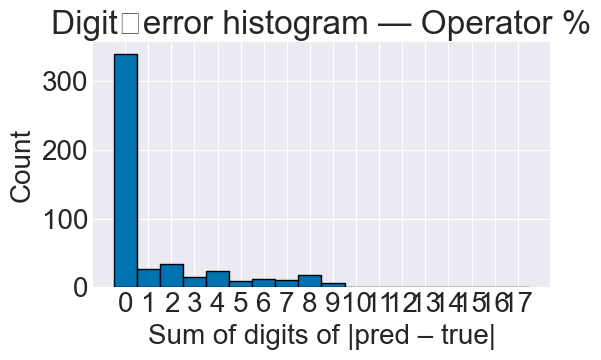

Non‐numeric (unparsed) answers: 0
Mean digit‐error (parsed only): 1.35
Median digit‐error: 0.00
Max digit‐error: 17


In [38]:
import re
import numpy as np
import matplotlib.pyplot as plt

def safe_parse_predicted(gen_tokens):
    """Extract leading digits (or return NaN)."""
    s = ''.join(gen_tokens).split('.')[0]
    m = re.match(r'(\d+)', s)
    return int(m.group(1)) if m else np.nan

def sum_decimal_digits(n):
    """Sum the decimal digits of a non-negative integer n."""
    return sum(int(d) for d in str(n))

operators = ['+', '*', '/', '%']
for op in operators:
    print(f"\n— DOING OPERATOR {op} —")
    pred_hist, true_hist = train_and_evaluate_diff(
        N_eval=500, N_show=5, operation=op
    )
    # mask out any un-parsed (NaN) preds
    mask = ~np.isnan(pred_hist)
    num_bad = np.sum(~mask)
    
    # absolute difference
    diffs = np.abs(true_hist[mask] - pred_hist[mask]).astype(int)
    # digit‐errors
    digit_errors = np.array([sum_decimal_digits(d) for d in diffs])
    
    # 1) Histogram of digit‐errors
    plt.figure(figsize=(6,4))
    max_err = digit_errors.max() if digit_errors.size else 0
    bins = np.arange(0, max_err+2) - 0.5  # center bins on integers
    plt.hist(digit_errors, bins=bins, edgecolor='black', align='mid')
    plt.xticks(range(0, max_err+1))
    plt.xlabel("Sum of digits of |pred – true|")
    plt.ylabel("Count")
    plt.title(f"Digit‐error histogram — Operator {op}")
    plt.tight_layout()
    plt.show()
    
    # 2) Summary
    print(f"Non‐numeric (unparsed) answers: {num_bad}")
    print(f"Mean digit‐error (parsed only): {digit_errors.mean():.2f}")
    print(f"Median digit‐error: {np.median(digit_errors):.2f}")
    print(f"Max digit‐error: {digit_errors.max() if digit_errors.size else 0}")
